In [1]:
import pandas as pd

from libs.preprocessing import MetaboPreprocer
from libs.multivariate_analysis import MultiVariateAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Prepared the (prefiltered or scaled) dataset

preprocessor = MetaboPreprocer(
    step_blank_substrateion=True,
    step_filter_rsd=False,
    qc_label='Mix',
    scaling='pareto',
    file_save=False,
)


df_scaled, df_ori = preprocessor.preprocessing(
    './data/example_dataset.xlsx',
    sheet_name='Pos_transpose',
    label_list= ['Control', 'Severe', 'Mild', 'Moderate']
)

=========== Preprocessing ==========
Original dataset shape (n_samples, n_features + 2) = (134, 3011)
A total of 0 missing values were detected
25 features have all zero values. These featuers are removed
========== Substrate the blank intensity from raw(original) intensity ==========
Removal of featuers with more than 50.0% proportion of negative values in all groups
Before the substration process, dataset shape (n_samples, n_features + 2) = (134, 2986).
After the substration process, dataset shape (n_samples, n_features + 2) = (107, 1015).
========== Label Selectioin ==========
['Control', 'Severe', 'Mild', 'Moderate'] features are selected and scaled
Processed dataset shape (n_samples, n_features + 2) = (80, 1015)



In [3]:
# or directly read the dataset
# df_scaled = pd.read_csv('./data/dataset_filtered_scaled.csv')

In [4]:
multi_analysis= MultiVariateAnalysis(n_components=5)

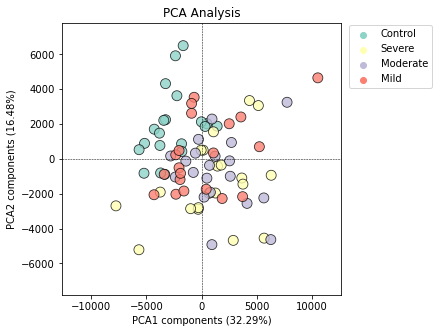

In [5]:
_ = multi_analysis.pca_analysis(df_scaled)

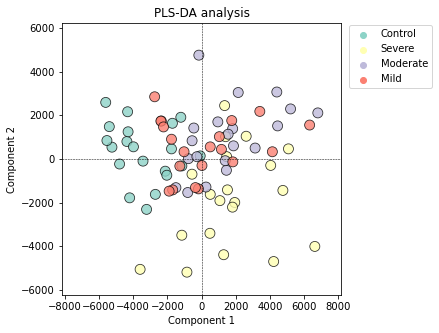

In [6]:
_ = multi_analysis.plsda_analysis(df_scaled)

=========== Preprocessing ==========
Original dataset shape (n_samples, n_features + 2) = (134, 3011)
A total of 0 missing values were detected
25 features have all zero values. These featuers are removed
========== Substrate the blank intensity from raw(original) intensity ==========
Removal of featuers with more than 50.0% proportion of negative values in all groups
Before the substration process, dataset shape (n_samples, n_features + 2) = (134, 2986).
After the substration process, dataset shape (n_samples, n_features + 2) = (107, 1015).
========== Label Selectioin ==========
['Control', 'Severe'] features are selected and scaled
3 features have all zero values. These featuers are removed
Processed dataset shape (n_samples, n_features + 2) = (40, 1012)



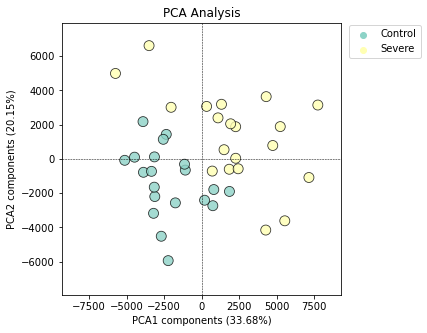

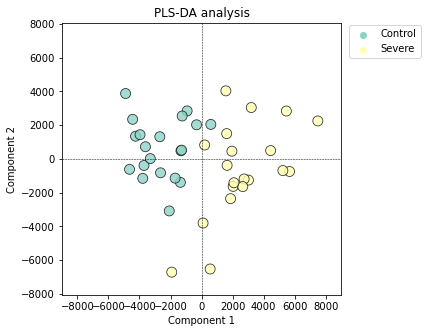

In [7]:
# preprocessor enables to select the label(group class)
# eg, [Control, Severe, Moderate, Mild] to [Control, Severe]

df_scaled, df_ori = preprocessor.preprocessing(
    './data/example_dataset.xlsx',
    sheet_name='Pos_transpose',
    label_list= ['Control', 'Severe']
)

_ = multi_analysis.pca_analysis(df_scaled)
_ = multi_analysis.plsda_analysis(df_scaled)